# Losses trade-off

In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scienceplots
import seaborn as sns
from pathlib import Path

In [2]:
plt.style.use('science')

In [3]:
date = "2023-03-14-22-37-07"
experiment = "hatexplain-lime-distilbert-2"

here_path = Path().absolute()
experiments_path = here_path.parent / "data" / "experiments"
experiment_path = experiments_path / date / experiment
losses_path = experiment_path / "losses.jsonl"

In [4]:
losses = []
with open(losses_path, 'r') as f:
    for line in f:
        losses.append(json.loads(line))

In [5]:
losses = sorted(losses, key=lambda x: x['weight'])
weights = [loss['weight'] for loss in losses]
losses = [[loss['cross_entropy_loss'], loss['contrastive_loss']] for loss in losses]
losses = np.array(losses)

In [6]:
weights = weights[1:]
losses = losses[1:]

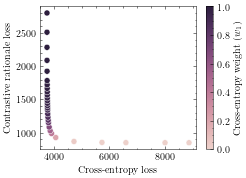

In [7]:
w1 = weights
fig, ax = plt.subplots()
sns.scatterplot(
    x="Cross-entropy loss",
    y="Contrastive rationale loss",
    data=pd.DataFrame(
        losses,
        columns=["Cross-entropy loss", "Contrastive rationale loss"]
    ),
    hue=w1,
    ax=ax,
)
# plt.title("Trade-off between losses")
ax.get_legend().remove()
norm = plt.Normalize(0, max(w1))
cmap = sns.cubehelix_palette(as_cmap=True)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
fig.colorbar(
    sm,
    orientation="vertical",
    label="Cross-entropy weight ($w_1$)",
)
plt.savefig("losses_trade_off.pdf", dpi=300, bbox_inches="tight")